### Importando as bibliotecas necessárias

In [33]:
# Importando as bilbiotecas:
import numpy as np
import matplotlib.pyplot as plt

# Importando as bibliotecas Scikit-Learn:
from sklearn.datasets import load_digits
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# Importando as bibliotecas do scikit learn:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Importando bilbioteca mágica
%matplotlib inline

### Gerando o dataset

In [13]:
# Definindo a semente:
semente = 42

# Gerando as features e os targets:
x, y = make_classification(n_samples=10000, n_classes=2, weights=[0.9, 0.5], random_state=semente)

### Dividino o dataset

In [14]:
# Dividindo o dataset em treino e teste:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)

# Gaussian

In [37]:

# Instânciando o classificador gaussiano:
gnb = GaussianNB()

# Treinando o dataset
gnb.fit(x_train, y_train)

# Obtendo a probabilidade:
gnb_prob = gnb.predict_proba(x_test)

# Logistic regression

In [36]:
# Instânciando o classificador logístico:
lrc = LogisticRegression()

# Treinando o dataset:
lrc.fit(x_train, y_train)

# Obtendo a probabilidade:
lrc_prob = lrc.predict_proba(x_test)

# k-NN

### Definição do GridSearchCV

#### Biblioteca em: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
# Definindo os parâmetros
param =[{'weights':['uniform', 'distance'],'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                                                          15, 20, 25, 30, 35, 40, 45, 50,
                                                         100, 200, 300, 400, 500, 600]}]

# Instanciando o classificador k-NN:
clf = KNeighborsClassifier()

# Instânciando o GridSearchCV:
gridsearchcv = GridSearchCV(clf, param, cv=5, verbose=3, n_jobs=-1)

# Efetuando o treinamento do modelo;
gridsearchcv.fit(x_train, y_train)

### Exibindo os resultados

In [19]:
print('O melhor parâmetro encontrado foi: {}'.format(gridsearchcv.best_params_))
print('A melhor probabilidade encontrada foi: {:.2f}%'.format(gridsearchcv.best_score_* 100))

O melhor parâmetro encontrado foi: {'n_neighbors': 40, 'weights': 'uniform'}
A melhor probabilidade encontrada foi: 86.05%


### Treinamento

In [28]:
# Instânciando o classificador k-NN:
clf = KNeighborsClassifier(n_neighbors=20, weights='distance')

# Treinando o modelo:
clf.fit(x_train, y_train)

# Obtendo a probabilidade para cada classe:
clf_prob = clf.predict_proba(x_test)

# ...

# Exibindo os resultados:

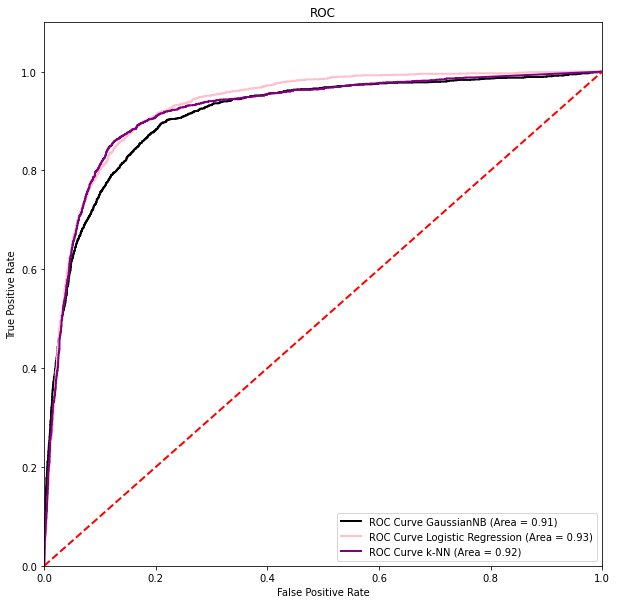

In [44]:
# Computando a curva ROC para cada classe.
plt.figure(figsize=(10, 10))
fpr, tpr, _ = roc_curve(y_test, gnb_prob[:, 1])
fpr2, tpr2, _ = roc_curve(y_test, lrc_prob[:, 1])
fpr3, tpr3, _ = roc_curve(y_test, clf_prob[:, 1])
Roc_auc1 = auc(fpr, tpr)
Roc_auc2 = auc(fpr2, tpr2)
Roc_auc3 = auc(fpr3, tpr3)

# PLotando a curva ROC
lw = 2
plt.plot(fpr, tpr, color='black', lw=lw, label='ROC Curve GaussianNB (Area = %0.2f)' % Roc_auc1)
plt.plot(fpr2, tpr2, color='pink', lw=lw, label='ROC Curve Logistic Regression (Area = %0.2f)' % Roc_auc2)
plt.plot(fpr3, tpr3, color='purple', lw=lw, label='ROC Curve k-NN (Area = %0.2f)' % Roc_auc3)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
#plt.savefig('ROC.png', dpi=600)
plt.show()